# Cyclone track

In this last example, we showcases how **RADWave** can be used to query wave conditions from altimeter database along a specified cyclone track.

## Loading RADWave library and initialisation

We first start by importing **RADwave** library into our working space.

In [1]:
import RADWave as rwave

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

First we will use already downloaded dataset of track of cyclone YASI. The data was obtained from the Australian Bureau of Meteorology ([BOM cyclone tracks](http://www.bom.gov.au/cyclone/history/tracks/)).

To load this file in the `waveAnalysis` class, the cyclone track needs to be a `CSV` file with in the header having the following keyword names `lon`, `lat` & `datetime`. 

To only visualise the tracks on a map, a minimal number of options have to be set as shown in the cell below:

In [2]:
cyc = rwave.waveAnalysis(cycloneCSV='../pracenv/dataset/2010-YASI.csv')

Plotting the tracks is done by using the following function:

/Users/getafix/anaconda3/envs/coast/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/getafix/anaconda3/envs/coast/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


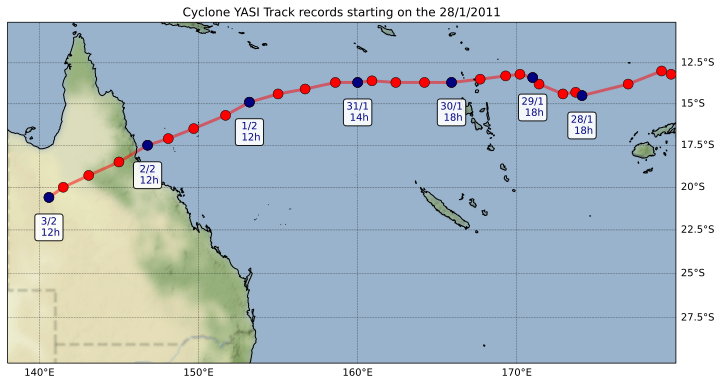

In [3]:
cyc.plotCycloneTracks(title="Cyclone YASI Track", markersize=100, zoom=4, 
                     extent=[138, 180, -30, -10], fsize=(12, 10))

The geographical extent of the cyclone path and the associated time frame can be infered from the figure above. 

This was used to specify the altimeter data record **location** and **temporal extent** when using the Australian Ocean Data Network portal [AODN](https://portal.aodn.org.au/).


> As for the other examples, we recomend to look at **RADWave** [documentation](https://radwave.readthedocs.io/en/latest/usage.html#getting-altimeter-values-from-data-providers) and the embeded video that explain how to select both a spatial bounding box and a temporal extent from the portal and how to export the file containing the `List of URLs`. This `TXT` file contains a list of `NETCDF` files for each available satellites. 


We will now create 2 new **RADWave** classes names (`wa_east` and `wa_west`) that will, in addition to the cyclone track, set the list of altimeter `NETCDF` URLs files to query for the analyse in 2 different regions.

For a detail overview of the options available in this class, you can have a look at the [waveAnalysis API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis).


We also call the `processAltimeterData` function to query the actual dataset and store the altimeter data in each class. The description of this function is available from the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.processAltimeterData).

### For the eastern region

In [4]:
wa_east = rwave.waveAnalysis(altimeterURL='../pracenv/dataset/IMOS_YASI_east.txt', bbox=[170, 175, -17, -12], 
                  stime=[2011,1,27], etime=[2011,2,4], cycloneCSV='../pracenv/dataset/2010-YASI.csv')

wa_east.processAltimeterData(max_qc=1, altimeter_pick='all', saveCSV = 'altimeterDataE.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks                               19  
   +  name CRYOSAT-2   / number of tracks                               25  
   +  name ENVISAT     / number of tracks                               25  
 
Processing altimeter dataset took:  3 s


### For the western region

In [5]:
wa_west = rwave.waveAnalysis(altimeterURL='../pracenv/dataset/IMOS_YASI_west.txt', bbox=[156, 161, -16, -12], 
                  stime=[2011,1,27], etime=[2011,2,4], cycloneCSV='../pracenv/dataset/2010-YASI.csv')

wa_west.processAltimeterData(max_qc=1, altimeter_pick='all', saveCSV = 'altimeterDataW.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks                               16  
   +  name CRYOSAT-2   / number of tracks                               20  
   +  name ENVISAT     / number of tracks                               20  
 
Processing altimeter dataset took:  3 s


In the case where a cyclone track is given when initialising the `waveAnalysis` class, the `visualiseData` plots not only the extent of the altimeter dataset but also the associated path.

/Users/getafix/anaconda3/envs/coast/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/getafix/anaconda3/envs/coast/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


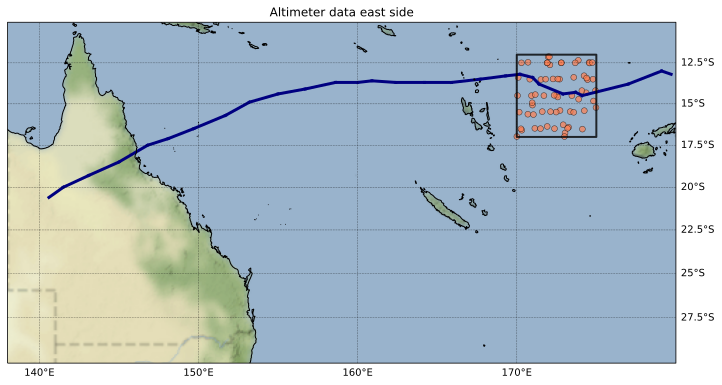

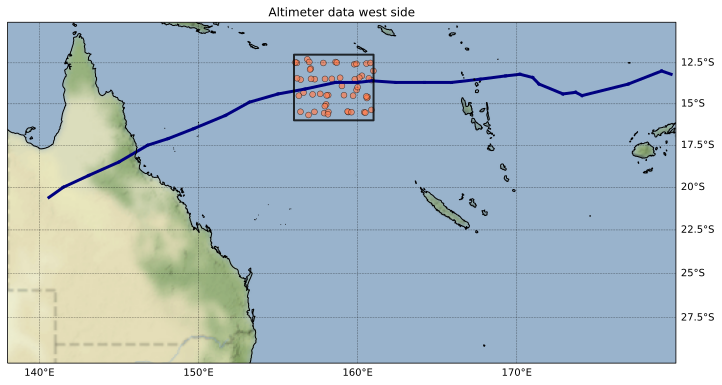

In [6]:
wa_east.visualiseData(title="Altimeter data east side", extent=[138, 180, -30, -10.0], 
                 markersize=35, zoom=4, fsize=(12, 10), fsave=None)

wa_west.visualiseData(title="Altimeter data west side", extent=[138, 180, -30, -10.0], 
                 markersize=35, zoom=4, fsize=(12, 10), fsave=None)

## Extracting relevant wave dataset

Once the data has been loaded, the following step consist in computing the wave [parameters](https://radwave.readthedocs.io/en/latest/method.html#) by running the `generateTimeSeries` function.

This function computes both **instantaneous** and **monthly** wave variables:

+ significant wave height (m) - wh & wh_rolling
+ wave period (s)  - period & period_rolling
+ wave energy flux (kW/m)  - power & power_rolling
+ wave average energy density (J/m2)  - energy & energy_rolling
+ wave group velocity (m/s)  - speed & speed_rolling

In [7]:
east_ts = wa_east.generateTimeSeries()

west_ts = wa_west.generateTimeSeries()

From the cyclone track, we find the closest processed altimeter geographical locations that have been recorded in the database (based on a `KDTree` search). 

> In addition to their coordinates, the altimeter dataset has to be recorded during a user defined time lapse close enough to the cyclone path time at each position.

This is done using the `close2Track` function that takes the following arguments:

+ `radius`, the maximum radius distance in degree between cyclone position and altimeter data coordinates [here set to 2.]
+ `dtmax`, the maximum difference in time between recorded cyclone date and picked altimeter data (hours) [here set to 6]

This function stores a Pandas dataframe in the `waveAnalysis` class called `cyclone_data` that contains the following variables:

+ altimeter significant wave height (m) - wH
+ altimeter wave period (s) - period
+ altimeter wave energy flux (kW/m) - power
+ altimeter wave average energy density (J/m2) - energy
+ altimeter wave group velocity (m/s) - speed
+ distance between altimeter coordinates and cyclone path (km) - dist
+ cyclone date (datetime) - cdate 
+ difference in time between recorded cyclone date and altimeter data for specific position (hours) - hours
+ cyclone latitude position - clat
+ cyclone longitude position - clon
+ altimeter data latitude position - lat
+ altimeter data longitude position - lon

Depending of the available altimeters dataset and the chosen `radius` and `dtmax` parameters, the Pandas dataframe `cyclone_data` will contain different number of values (or can potentially be empty).

In [8]:
east_track = wa_east.close2Track(radius=2.,dtmax=6.)
display(wa_east.cyclone_data)

west_track = wa_west.close2Track(radius=2.,dtmax=6.)
display(wa_west.cyclone_data)

,period,speed,power,energy,dist,date,wH,lon,lat,clon,clat,hours
0,5.440683,8.491691,27.794308,8.491691,113.604,2011-01-28 18:00:00+00:00,1.614,174.444580,-13.529891,174.1,-14.5,-2.284
1,5.749904,8.974317,29.812409,8.974317,33.699,2011-01-28 18:00:00+00:00,1.626,174.359543,-14.330362,174.1,-14.5,-2.280
2,5.903791,9.214501,41.094925,9.214501,102.590,2011-01-28 18:00:00+00:00,1.884,174.243790,-15.416570,174.1,-14.5,-2.275
3,5.893205,9.197977,27.622688,9.197977,213.351,2011-01-29 06:00:00+00:00,1.546,170.924179,-14.505723,172.9,-14.4,-2.008


,period,speed,power,energy,dist,date,wH,lon,lat,clon,clat,hours
0,6.756970,10.546121,265.003090,10.546121,213.219,2011-01-31 12:00:00+00:00,4.4720,159.141006,-14.474576,160.9,-13.6,-0.424
1,6.294248,9.823916,197.842215,9.823916,207.053,2011-01-31 12:00:00+00:00,4.0035,159.012177,-13.911661,160.9,-13.6,-0.421
2,5.388097,8.409617,215.400314,8.409617,121.468,2011-01-31 12:00:00+00:00,4.5150,160.805725,-12.505943,160.9,-13.6,4.477
3,6.742534,10.523590,645.875203,10.523590,26.814,2011-01-31 12:00:00+00:00,6.9890,160.705750,-13.449617,160.9,-13.6,4.482
4,8.084588,12.618237,917.565692,12.618237,121.311,2011-01-31 12:00:00+00:00,7.6075,160.578125,-14.650486,160.9,-13.6,4.487
5,9.622043,15.017862,1129.556402,15.017862,218.935,2011-01-31 12:00:00+00:00,7.7370,160.483597,-15.536715,160.9,-13.6,4.491
6,6.898052,10.766320,272.597023,10.766320,207.058,2011-01-31 14:00:00+00:00,4.4890,159.369446,-15.467758,160.0,-13.7,-2.428
7,6.756970,10.546121,265.003090,10.546121,126.292,2011-01-31 14:00:00+00:00,4.4720,159.141006,-14.474576,160.0,-13.7,-2.424
8,6.294248,9.823916,197.842215,9.823916,109.344,2011-01-31 14:00:00+00:00,4.0035,159.012177,-13.911661,160.0,-13.7,-2.421
9,6.351562,9.913371,182.333266,9.913371,123.287,2011-01-31 14:00:00+00:00,3.8260,158.898865,-13.414909,160.0,-13.7,-2.419


## Visualising the relevant altimeters date

**RADWave** provides a plotting function to visualise the processed wave data called `plotCycloneAltiPoint` that can be used to also provide information about wave parameters for each data point (by turning the `showinfo` flag to True as explained in the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.plotCycloneAltiPoint).

An example of how to call this function is presented below:

/Users/getafix/anaconda3/envs/coast/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/getafix/anaconda3/envs/coast/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


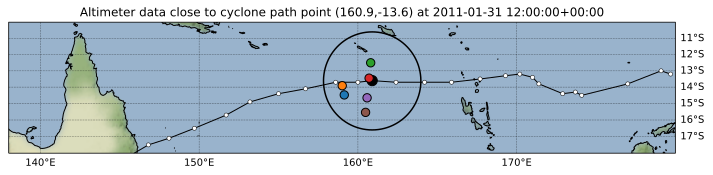

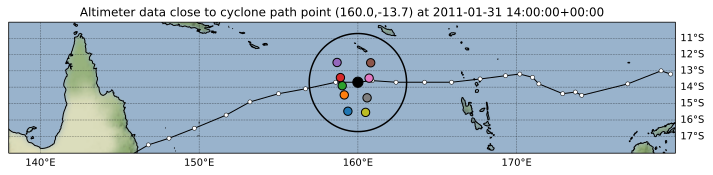

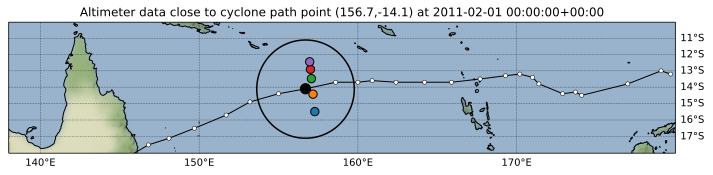

In [9]:
wa_west.plotCycloneAltiPoint(showinfo=False, extent=[138, 180, -18, -10], 
                 markersize=35, zoom=4, fsize=(12, 5))

 
++++++++++++++++++++++++++++++++++++++++++++

Considered cyclone path point (160.9,-13.6) at 2011-01-31 12:00:00+00:00



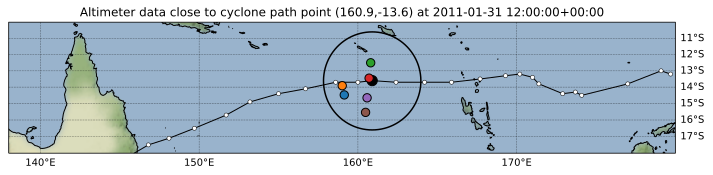

Altimeter point (159.1,-14.5) records dt: -0.42h
    +    Power  265.0 kW/m
    +   Energy  10.55 J/m2
    + Celerity  10.55 m/s
    +   Period  6.76 s
    +   Height  4.47 m
 
Altimeter point (159.0,-13.9) records dt: -0.42h
    +    Power  197.84 kW/m
    +   Energy  9.82 J/m2
    + Celerity  9.82 m/s
    +   Period  6.29 s
    +   Height  4.0 m
 
Altimeter point (160.8,-12.5) records dt: 4.48h
    +    Power  215.4 kW/m
    +   Energy  8.41 J/m2
    + Celerity  8.41 m/s
    +   Period  5.39 s
    +   Height  4.52 m
 
Altimeter point (160.7,-13.4) records dt: 4.48h
    +    Power  645.88 kW/m
    +   Energy  10.52 J/m2
    + Celerity  10.52 m/s
    +   Period  6.74 s
    +   Height  6.99 m
 
Altimeter point (160.6,-14.7) records dt: 4.49h
    +    Power  917.57 kW/m
    +   Energy  12.62 J/m2
    + Celerity  12.62 m/s
    +   Period  8.08 s
    +   Height  7.61 m
 
Altimeter point (160.5,-15.5) records dt: 4.49h
    +    Power  1129.56 kW/m
    +   Energy  15.02 J/m2
    + Celerity  

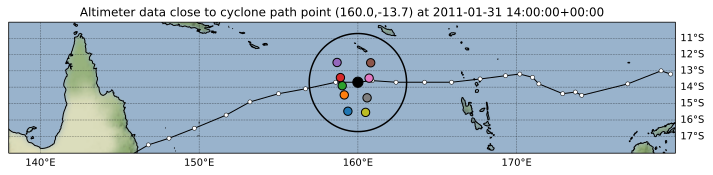

Altimeter point (159.4,-15.5) records dt: -2.43h
    +    Power  272.6 kW/m
    +   Energy  10.77 J/m2
    + Celerity  10.77 m/s
    +   Period  6.9 s
    +   Height  4.49 m
 
Altimeter point (159.1,-14.5) records dt: -2.42h
    +    Power  265.0 kW/m
    +   Energy  10.55 J/m2
    + Celerity  10.55 m/s
    +   Period  6.76 s
    +   Height  4.47 m
 
Altimeter point (159.0,-13.9) records dt: -2.42h
    +    Power  197.84 kW/m
    +   Energy  9.82 J/m2
    + Celerity  9.82 m/s
    +   Period  6.29 s
    +   Height  4.0 m
 
Altimeter point (158.9,-13.4) records dt: -2.42h
    +    Power  182.33 kW/m
    +   Energy  9.91 J/m2
    + Celerity  9.91 m/s
    +   Period  6.35 s
    +   Height  3.83 m
 
Altimeter point (158.7,-12.5) records dt: -2.41h
    +    Power  114.02 kW/m
    +   Energy  9.46 J/m2
    + Celerity  9.46 m/s
    +   Period  6.06 s
    +   Height  3.1 m
 
Altimeter point (160.8,-12.5) records dt: 2.48h
    +    Power  215.4 kW/m
    +   Energy  8.41 J/m2
    + Celerity  8.41

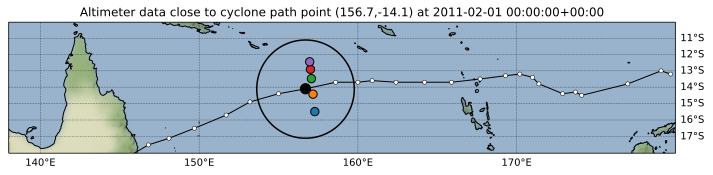

Altimeter point (157.3,-15.5) records dt: 4.75h
    +    Power  1659.79 kW/m
    +   Energy  15.86 J/m2
    + Celerity  15.86 m/s
    +   Period  10.16 s
    +   Height  9.12 m
 
Altimeter point (157.2,-14.4) records dt: 4.76h
    +    Power  866.4 kW/m
    +   Energy  12.24 J/m2
    + Celerity  12.24 m/s
    +   Period  7.84 s
    +   Height  7.51 m
 
Altimeter point (157.1,-13.5) records dt: 4.76h
    +    Power  340.23 kW/m
    +   Energy  10.19 J/m2
    + Celerity  10.19 m/s
    +   Period  6.53 s
    +   Height  5.15 m
 
Altimeter point (157.0,-12.9) records dt: 4.76h
    +    Power  301.69 kW/m
    +   Energy  10.88 J/m2
    + Celerity  10.88 m/s
    +   Period  6.97 s
    +   Height  4.7 m
 
Altimeter point (157.0,-12.4) records dt: 4.77h
    +    Power  297.47 kW/m
    +   Energy  9.84 J/m2
    + Celerity  9.84 m/s
    +   Period  6.31 s
    +   Height  4.9 m
 


In [10]:
wa_west.plotCycloneAltiPoint(showinfo=True, extent=[138, 180, -18, -10], 
                 markersize=35, zoom=4, fsize=(12, 5))

> As already mentioned in the different examples, the class **waveAnalysis()** saves most of the processed wave data as Pandas dataframe (such as `timeseries` or `cyclone_data`) that can be used for further analysis.